# Falling Coffee Filter

The discussion on this notebook follows the text closely. Refer to pages 59 (bottom) through 63.

The following data track a coffee filter that was released to fall under the influence of gravity. The large surface area of the coffee filter makes air resistance an important consideration. You will soon learn there are complexities in real data acquired with experimental and measurement errors. To begin, note the time value does not start at zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.

In [ ]:
# I've tried to save this notebook in such a way that an image of the output appears below, so you can check your result against it.
# Please let me know if you don't see the graph below that plots position vs. time.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fall_data = pd.read_csv('data/filterfall1.csv')

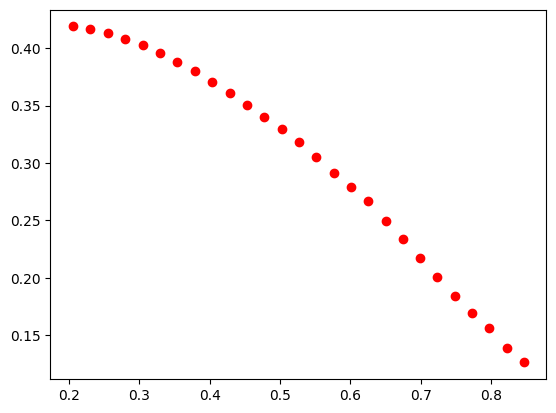

In [75]:
plt.plot(fall_data['Time'], fall_data['Position'], 'ro')

## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine the first and second derivatives of position: velocity, and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


In [125]:
fall_data['Position'].values

array([0.4188, 0.4164, 0.4128, 0.4082, 0.4026, 0.3958, 0.3878, 0.3802,
       0.3708, 0.3609, 0.3505, 0.34  , 0.3297, 0.3181, 0.3051, 0.2913,
       0.2788, 0.2667, 0.2497, 0.2337, 0.2175, 0.2008, 0.1846, 0.1696,
       0.1566, 0.1393, 0.1263])

Text(0.5, 1.0, 'Acceleration vs. Velocity')

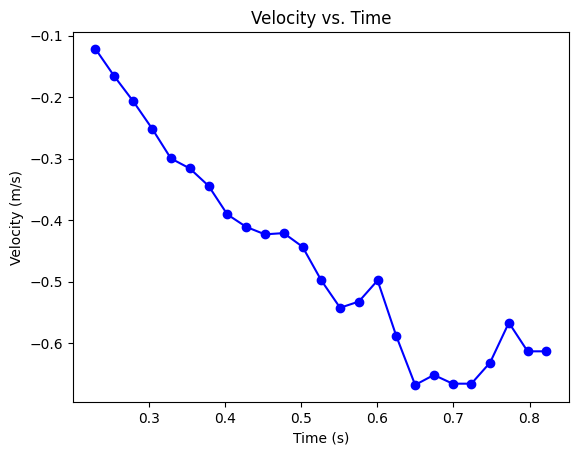

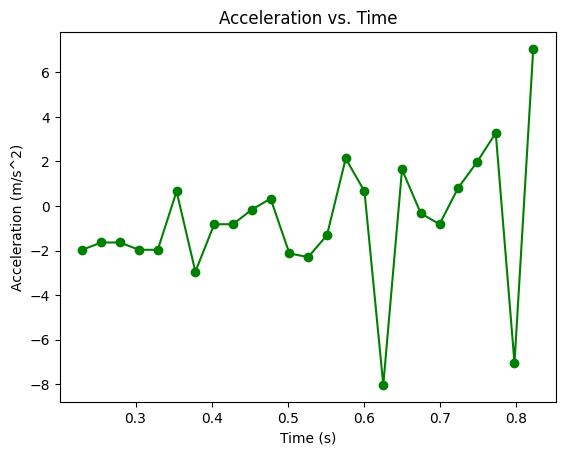

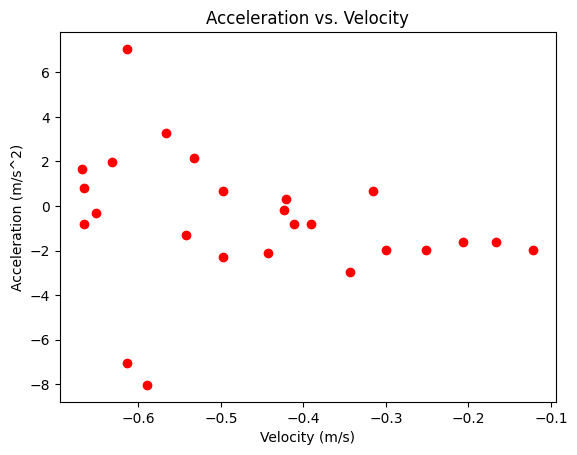

In [174]:
delta_t_d = fall_data['Time'][1] - fall_data['Time'][0]
time_d = fall_data['Time']
position_d = fall_data['Position']

# below we slice with 2:-2 to avoid the first and last points, which don't have a corresponding point to the left or right for the central difference
velocity_d = (position_d[2:].values - position_d[:-2].values) / (2 * delta_t_d) # central difference
acceleration_d = (position_d[2:].values - 2 * position_d[1:-1].values + position_d[:-2].values) / delta_t_d**2 # central difference

plt.figure()
plt.plot(time_d[1:-1], velocity_d, 'b-o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')

plt.figure()
plt.plot(time_d[1:-1], acceleration_d, 'g-o')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs. Time')

plt.figure()
plt.plot(velocity_d, acceleration_d, 'ro')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs. Velocity')

### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or 

$$F_d = C_2v^2$$ 

depending on the speed and diameter of the objects. 

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$ 

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$ 

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.

In [150]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Euler(dt, f, t, y, args):
    return y + f(t,y,*args) * dt 

def EulerCromer(dt, f, t, y, args):
    y_end = y + f(t,y,*args) * dt
    return y + f(t+dt, y_end, *args) * dt

def EulerRichardson(dt, f, t, y, args):
    y_mid = y + f(t,y,*args) * dt/2
    return y + f(t+dt/2, y_mid, *args) * dt


def solve_ode(f,tspan, y0, method = Euler, *args, **options):
    """
    Given a function f that returns derivatives,
    dy / dt = f(t, y)
    and an inital state:
    y(tspan[0]) = y0
    
    This function will return the set of intermediate states of y
    from t0 (tspan[0]) to tf (tspan[1])
    
    
    
    The function is called as follows:
    
    INPUTS 
    
    f - the function handle to the function that returns derivatives of the 
        vector y at time t. The function can also accept parameters that are
        passed via *args, eg f(t,y,g) could accept the acceleration due to gravity.
        
    tspan - a indexed data type that has [t0 tf] as its two members. 
            t0 is the initial time
            tf is the final time
    
    y0 - The initial state of the system, must be passed as a numpy array.
    
    method - The method of integrating the ODEs. This week will be one of Euler, 
             Euler-Cromer, or Euler-Richardson
    
    *args - a tuple containing as many additional parameters as you would like for 
            the function handle f.
    
    **options - a dictionary containing all the keywords that might be used to control
                function behavior. For now, there is only one:
                
                first_step - the initial time step for the simulation.
    
    
    OUTPUTS
    
    t,y
    
    The returned states will be in the form of a numpy array
    t containing the times the ODEs were solved at and an array
    y with shape tsteps,N_y where tsteps is the number of steps 
    and N_y is the number of equations. Observe this makes plotting simple:
    
    plt.plot(t,y[:,0])
    
    would plot positions.
    
    """
    
    t0 = tspan[0]
    tf = tspan[1]
    y = [y0]
    t = [t0]
    dt = options.get('first_step')#,0.1)
    
    while t[-1]<tf:
        y.append(method(dt, f, t[-1], y[-1], args))
        t.append(t[-1] + dt)
    
    return np.array(t), np.array(y)

In [156]:
def freefall_with_drag(t,y,g,v_t,p):
    """
    This function returns the derivatives of the state y
    at time t for a freefalling object near the surface of the earth.
    
    y[0] = position
    y[1] = velocity
    
    g = acceleration due to gravity
    v_t = terminal velocity
    p = power on velocity term
    """
    dydt = y[1]
    dvdt = -g*(1-(dydt/v_t)**p)
    
    return np.array([dydt, dvdt])

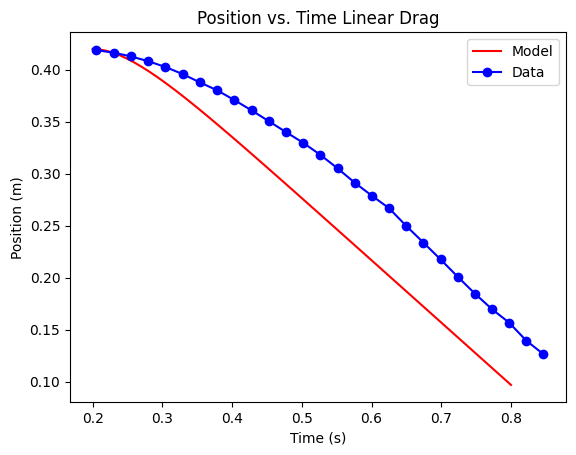

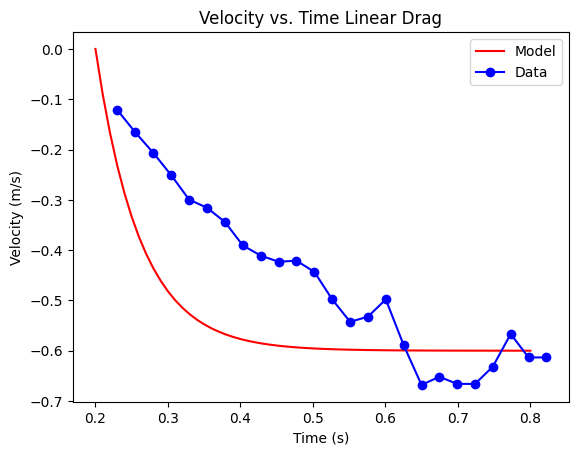

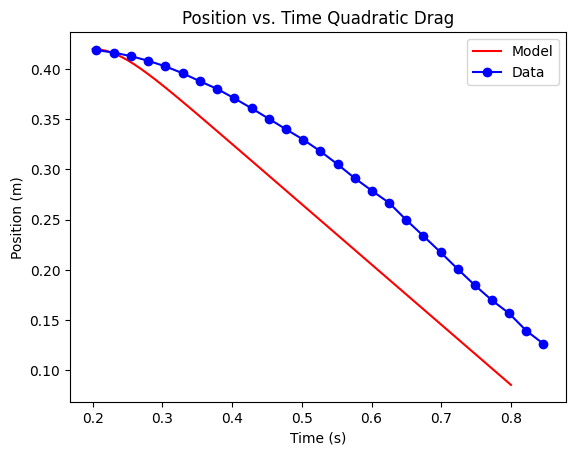

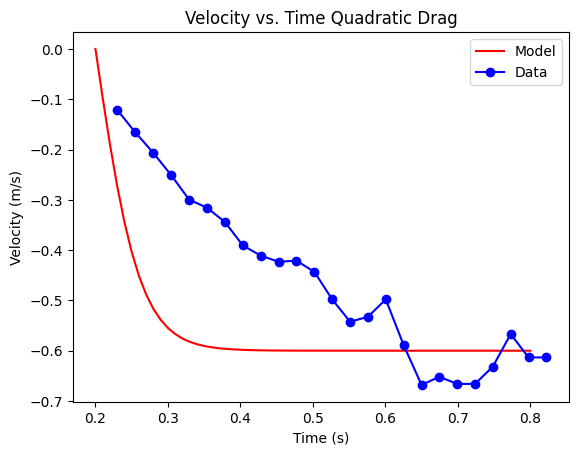

In [166]:
g = 9.8
tspan = [0.2,0.8]
y0 = np.array([0.42, 0])
dt = 0.01
v_t = -0.6

p = 1

t, y = solve_ode(freefall_with_drag, tspan, y0, EulerRichardson,g,v_t,p, first_step = dt)

plt.figure()
plt.plot(t, y[:,0], 'r-')
plt.plot(time_d, position_d, 'b-o')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time Linear Drag')
plt.legend(['Model', 'Data'])

plt.figure()
plt.plot(t, y[:,1], 'r-')
plt.plot(time_d[1:-1], velocity_d, 'b-o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time Linear Drag')
plt.legend(['Model', 'Data'])

p = 2

t, y = solve_ode(freefall_with_drag, tspan, y0, EulerRichardson,g,v_t,p, first_step = dt)
plt.figure()
plt.plot(t, y[:,0], 'r-')
plt.plot(time_d, position_d, 'b-o')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time Quadratic Drag')
plt.legend(['Model', 'Data'])

plt.figure()
plt.plot(t, y[:,1], 'r-')
plt.plot(time_d[1:-1], velocity_d, 'b-o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time Quadratic Drag')
plt.legend(['Model', 'Data'])

plt.show()

### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it. 

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.


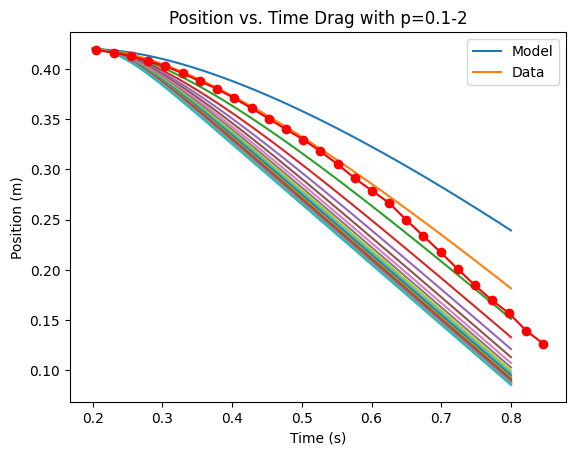

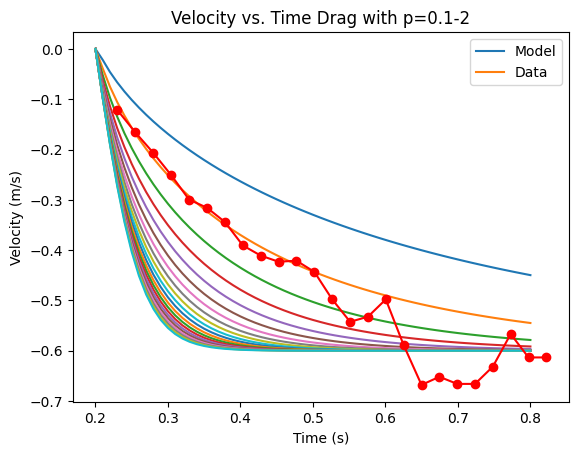

In [175]:
p_vals = np.linspace(0.1,2,20)

fig, ax = plt.subplots()

for p in p_vals:
    t, y = solve_ode(freefall_with_drag, tspan, y0, EulerRichardson,g,v_t,p, first_step = dt)
    ax.plot(t, y[:,0])

ax.plot(time_d, position_d, 'r-o')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time Drag with p=0.1-2')
plt.legend(['Model', 'Data'])
plt.show()

for p in p_vals:
    t, y = solve_ode(freefall_with_drag, tspan, y0, EulerRichardson,g,v_t,p, first_step = dt)
    plt.plot(t, y[:,1])

plt.plot(time_d[1:-1], velocity_d, 'r-o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time Drag with p=0.1-2')
plt.legend(['Model', 'Data'])
plt.show()